In [3]:
import pandas as pd

csv_path = r"C:\Users\nawal\Downloads\debrisSolver_cdm_dataset (1)\2024_S1_cdm_ccsds.csv"

# Load the dataset 
df = pd.read_csv(csv_path)

df.head()


,conjunction_id,ccsds_cdm_vers,comment_header,creation_date,originator,classification,message_for,message_id,event_id,comment_relative_metadata_data,...,object2_ctdot_t,object2_ctdot_n,object2_ctdot_rdot,object2_ctdot_tdot,object2_cndot_r,object2_cndot_t,object2_cndot_n,object2_cndot_rdot,object2_cndot_tdot,object2_cndot_ndot
0,4708712,1.0,COMMENT,2023-12-30 23:45:37.201629,SMS,NaN,NaN,sms9_4708712,3059662,COMMENT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4796676,1.0,COMMENT,2023-12-31 17:07:38.953699,SMS,NaN,NaN,sms9_4796676,3108026,COMMENT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4714477,1.0,COMMENT,2023-12-30 21:25:33.977263,SMS,NaN,NaN,sms9_4714477,3062731,COMMENT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4411173,1.0,COMMENT,2023-12-28 07:09:39.816940,SMS,NaN,NaN,sms9_4411173,2896647,COMMENT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4654350,1.0,COMMENT,2023-12-30 12:52:44.482941,SMS,NaN,NaN,sms9_4654350,3030325,COMMENT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['conjunction_id', 'ccsds_cdm_vers', 'comment_header', 'creation_date',
       'originator', 'classification', 'message_for', 'message_id', 'event_id',
       'comment_relative_metadata_data',
       ...
       'object2_ctdot_t', 'object2_ctdot_n', 'object2_ctdot_rdot',
       'object2_ctdot_tdot', 'object2_cndot_r', 'object2_cndot_t',
       'object2_cndot_n', 'object2_cndot_rdot', 'object2_cndot_tdot',
       'object2_cndot_ndot'],
      dtype='object', length=160)

In [6]:
# 1) Columns we *hope* to use
candidate_cols = [
    'conjunction_id',
    'creation_date',
    'miss_distance',
    'relative_speed',
    'tca'  # maybe exists, maybe not
]

# 2) Keep only the ones that actually exist in the dataframe
important_cols = [c for c in candidate_cols if c in df.columns]
print("Columns we will actually use:", important_cols)

# 3) Build smaller dataframe
df_small = df[important_cols].copy()
df_small.head()


Columns we will actually use: ['conjunction_id', 'creation_date', 'miss_distance', 'relative_speed', 'tca']


,conjunction_id,creation_date,miss_distance,relative_speed,tca
0,4708712,2023-12-30 23:45:37.201629,360.998008,4152.541202,2024-01-01 00:02:05.515000
1,4796676,2023-12-31 17:07:38.953699,230.331161,6774.705183,2024-01-01 00:02:42.456000
2,4714477,2023-12-30 21:25:33.977263,203.939751,8049.963408,2024-01-01 00:03:50.751000
3,4411173,2023-12-28 07:09:39.816940,391.652906,9631.056058,2024-01-01 00:06:15.343000
4,4654350,2023-12-30 12:52:44.482941,394.310174,1069.289496,2024-01-01 00:06:16.278000


In [7]:
print("Columns containing 'miss':", [c for c in df.columns if 'miss' in c.lower()])
print("Columns containing 'tca':",  [c for c in df.columns if 'tca'  in c.lower()])
print("Columns containing 'vel':",  [c for c in df.columns if 'vel'  in c.lower()])
print("Columns containing 'object1':", [c for c in df.columns if 'object1' in c.lower()])
print("Columns containing 'object2':", [c for c in df.columns if 'object2' in c.lower()])


Columns containing 'miss': ['miss_distance']
Columns containing 'tca': ['tca']
Columns containing 'vel': ['relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n']
Columns containing 'object1': ['comment_object1_metadata', 'object1_object_designator', 'object1_catalog_name', 'object1_object_name', 'object1_international_designator', 'object1_object_type', 'object1_operator_organization', 'object1_ephemeris_name', 'object1_covariance_method', 'object1_maneuverable', 'object1_orbit_center', 'object1_ref_frame', 'object1_cov_type', 'object1_cov_ref_frame', 'object1_gravity_model', 'object1_atmospheric_model', 'object1_n_body_perturbations', 'object1_solar_rad_pressure', 'object1_earth_tides', 'comment_object1_od_parameters', 'object1_time_lastob_start', 'object1_time_lastob_end', 'object1_recommended_od_span', 'object1_actual_od_span', 'object1_obs_available', 'object1_obs_used', 'object1_tracks_available', 'object1_tracks_used', 'object1_residuals_accepted', 'object1_weighted_

In [8]:
# Make sure dates are real datetime objects
df_small['creation_date'] = pd.to_datetime(df_small['creation_date'], errors='coerce')
df_small['tca'] = pd.to_datetime(df_small['tca'], errors='coerce')

# Compute warning time in hours (TCA - creation date)
df_small['warning_time_hours'] = (df_small['tca'] - df_small['creation_date']).dt.total_seconds() / 3600

df_small[['creation_date', 'tca', 'warning_time_hours']].head()

,creation_date,tca,warning_time_hours
0,2023-12-30 23:45:37.201629,2024-01-01 00:02:05.515,24.274531
1,2023-12-31 17:07:38.953699,2024-01-01 00:02:42.456,6.917640
2,2023-12-30 21:25:33.977263,2024-01-01 00:03:50.751,26.637993
3,2023-12-28 07:09:39.816940,2024-01-01 00:06:15.343,88.943202
4,2023-12-30 12:52:44.482941,2024-01-01 00:06:16.278,35.225499


In [9]:
# Summary stats for miss distance, relative speed, and warning time
df_small[['miss_distance', 'relative_speed', 'warning_time_hours']].describe()


,miss_distance,relative_speed,warning_time_hours
count,185511.000000,185511.000000,185358.000000
mean,315.595593,7414.595895,45.746582
std,121.299285,4512.002830,32.823966
min,1.582203,0.002862,-42.827271
25%,224.220467,4644.384904,21.948911
50%,329.618681,6961.857788,50.888747
75%,419.414860,10473.114520,72.955969
max,499.999072,16859.543888,110.742979


<Axes: title={'center': 'Warning time (hours)'}, ylabel='Frequency'>

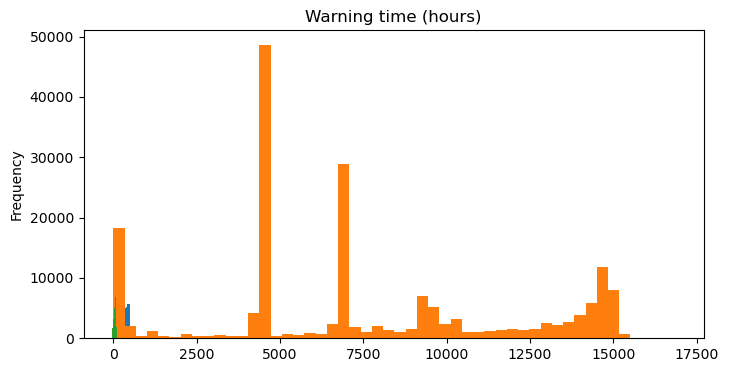

In [10]:
# Miss distance histogram
df_small['miss_distance'].plot.hist(bins=50, figsize=(8,4), title='Miss distance distribution')

# Relative speed histogram
df_small['relative_speed'].plot.hist(bins=50, figsize=(8,4), title='Relative speed distribution')

# Warning time histogram
df_small['warning_time_hours'].plot.hist(bins=50, figsize=(8,4), title='Warning time (hours)')


In [11]:
def classify_risk(row):
    d = row['miss_distance']
    v = row['relative_speed']
    
    # Example thresholds in meters & km/s (you can tune later)
    if d > 3000:
        return "Low"
    elif d > 1000:
        return "Medium"
    elif d > 300:
        return "High"
    else:
        return "Critical"

df_small['risk_level'] = df_small.apply(classify_risk, axis=1)

df_small['risk_level'].value_counts()


risk_level
High        106614
Critical     78897
Name: count, dtype: int64

In [12]:
critical_events = df_small[df_small['risk_level'] == 'Critical']
high_events = df_small[df_small['risk_level'] == 'High']

len_critical = len(critical_events)
len_high = len(high_events)

len_critical, len_high


(78897, 106614)

<Axes: title={'center': 'Miss Distance Distribution (Critical Events)'}, ylabel='Frequency'>

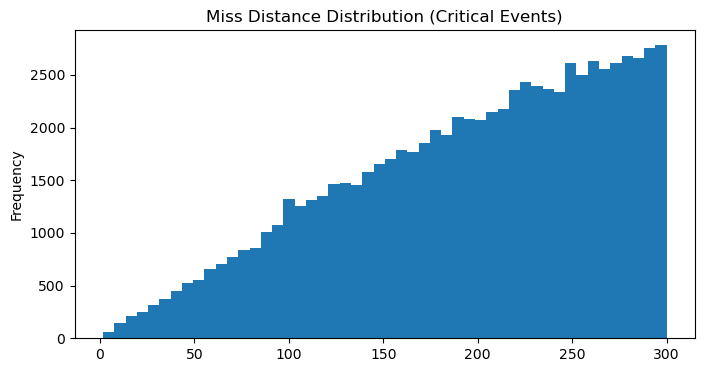

In [13]:
critical_events['miss_distance'].plot.hist(
    bins=50, 
    figsize=(8,4), 
    title='Miss Distance Distribution (Critical Events)'
)

<Axes: title={'center': 'Miss Distance Distribution (High-Risk Events)'}, ylabel='Frequency'>

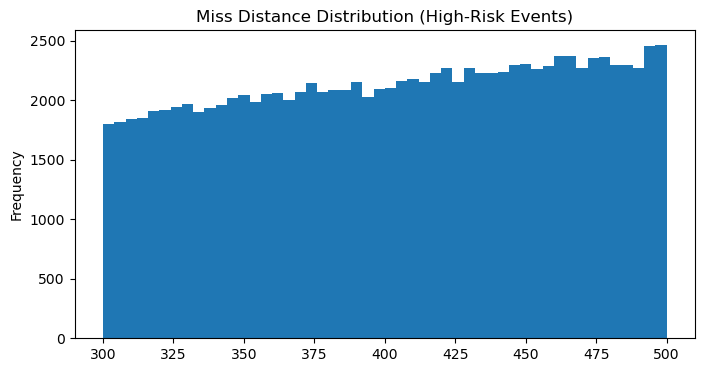

In [14]:
high_events['miss_distance'].plot.hist(
    bins=50, 
    figsize=(8,4), 
    title='Miss Distance Distribution (High-Risk Events)'
)

<Axes: title={'center': 'Warning Time (Hours) – Critical Events'}, ylabel='Frequency'>

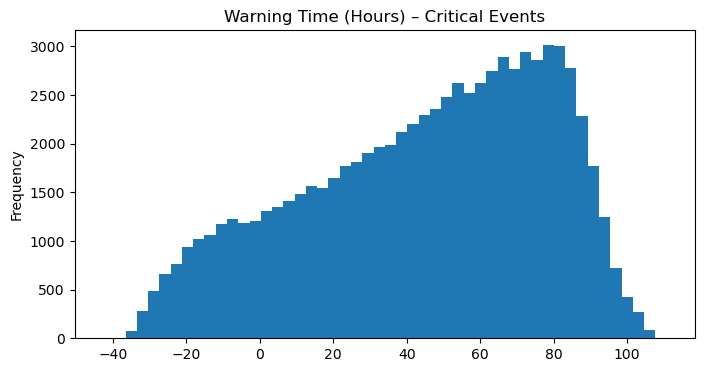

In [15]:
critical_events['warning_time_hours'].plot.hist(
    bins=50, 
    figsize=(8,4), 
    title='Warning Time (Hours) – Critical Events'
)

<Axes: title={'center': 'Relative Speed Distribution – Critical Events'}, ylabel='Frequency'>

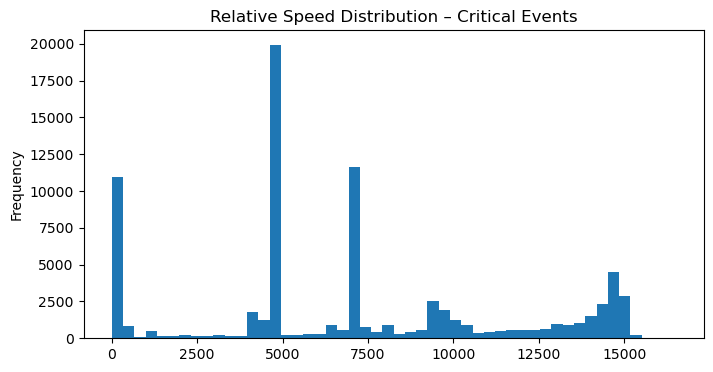

In [16]:
critical_events['relative_speed'].plot.hist(
    bins=50,
    figsize=(8,4),
    title='Relative Speed Distribution – Critical Events'
)

In [17]:
# Count high-risk and critical events

critical_events = df_small[df_small['risk_level'] == 'Critical']
high_events = df_small[df_small['risk_level'] == 'High']

print("Number of CRITICAL events:", len(critical_events))
print("Number of HIGH-RISK events:", len(high_events))


Number of CRITICAL events: 78897
Number of HIGH-RISK events: 106614


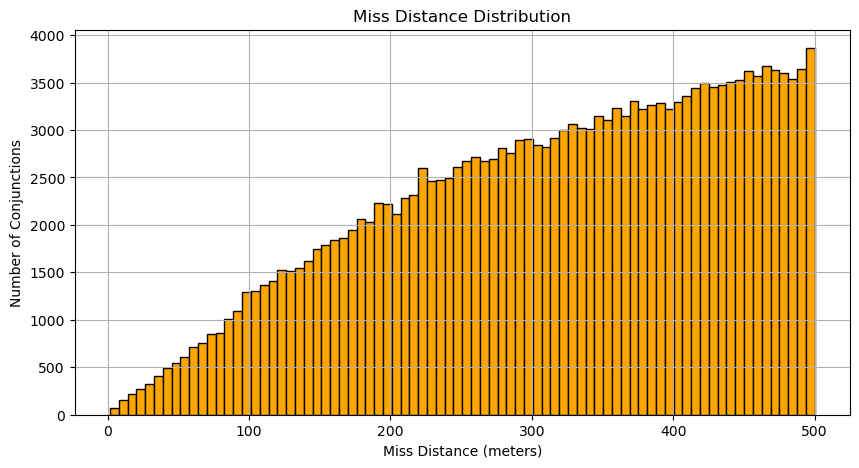

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df_small['miss_distance'], bins=80, color='orange', edgecolor='black')
plt.title("Miss Distance Distribution")
plt.xlabel("Miss Distance (meters)")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.show()


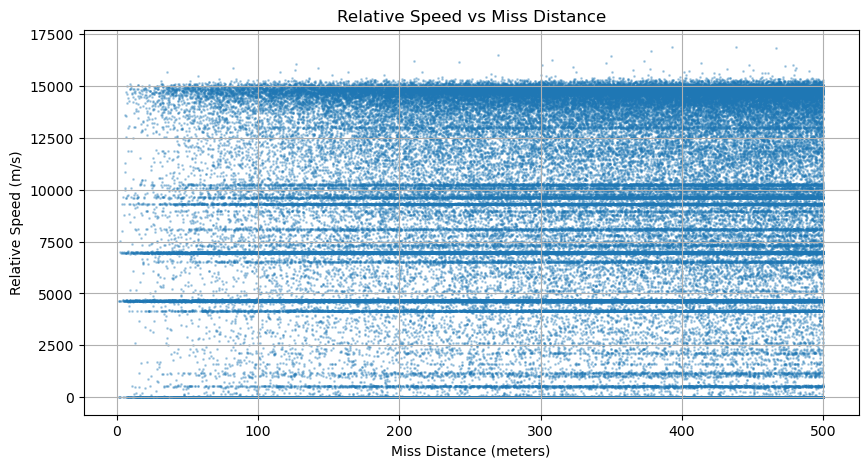

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(df_small['miss_distance'], df_small['relative_speed'], s=1, alpha=0.3)
plt.title("Relative Speed vs Miss Distance")
plt.xlabel("Miss Distance (meters)")
plt.ylabel("Relative Speed (m/s)")
plt.grid(True)
plt.show()


In [20]:
obj_types = df_small['object1_type'].value_counts().head(10)
obj_types


KeyError: 'object1_type'

In [21]:
[col for col in df_small.columns if "type" in col.lower()]

[]

In [1]:
df_small['tca'] = pd.to_datetime(df_small['tca'], errors='coerce')
df_small['creation_date'] = pd.to_datetime(df_small['creation_date'], errors='coerce')



NameError: name 'pd' is not defined

In [2]:
import pandas as pd


In [3]:
csv_path = r"C:\Users\nawal\Downloads\debrisSolver_cdm_dataset (1)\2024_S1_cdm_ccsds.csv"
df = pd.read_csv(csv_path)

candidate_cols = [
    'conjunction_id',
    'creation_date',
    'miss_distance',
    'relative_speed',
    'tca'
]

important_cols = [c for c in candidate_cols if c in df.columns]
df_small = df[important_cols].copy()


In [4]:
df_small['tca'] = pd.to_datetime(df_small['tca'], errors='coerce')
df_small['creation_date'] = pd.to_datetime(df_small['creation_date'], errors='coerce')


In [ ]:
# Group by day of TCA
daily_counts = df_small.groupby(df_small['tca'].dt.date).size()

plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title("Daily Conjunction Count")
plt.xlabel("Date")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.show()


In [2]:
# === ASTRA X CDM – SETUP BLOCK (run this once each session) ===

import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the full CDM CSV
csv_path = r"C:\Users\nawal\Downloads\debrisSolver_cdm_dataset (1)\2024_S1_cdm_ccsds.csv"
df = pd.read_csv(csv_path)

# 2) Keep only the key columns we use in the analysis
candidate_cols = [
    'conjunction_id',
    'creation_date',
    'miss_distance',
    'relative_speed',
    'tca'
]

important_cols = [c for c in candidate_cols if c in df.columns]
df_small = df[important_cols].copy()

# 3) Convert dates to real datetime
df_small['creation_date'] = pd.to_datetime(df_small['creation_date'], errors='coerce')
df_small['tca'] = pd.to_datetime(df_small['tca'], errors='coerce')

# 4) Compute warning time (hours between alert and TCA)
df_small['warning_time_hours'] = (df_small['tca'] - df_small['creation_date']).dt.total_seconds() / 3600

# 5) Classify risk level based on miss distance (simple, tunable logic)
def classify_risk(row):
    d = row['miss_distance']
    v = row['relative_speed']

    if pd.isna(d) or pd.isna(v):
        return "Unknown"
    if d > 3000:
        return "Low"
    elif d > 1000:
        return "Medium"
    elif d > 300:
        return "High"
    else:
        return "Critical"

df_small['risk_level'] = df_small.apply(classify_risk, axis=1)

print("✅ CDM setup complete.")
print("Rows:", len(df_small))
print("Columns:", list(df_small.columns))
print(df_small.head())


✅ CDM setup complete.
Rows: 185511
Columns: ['conjunction_id', 'creation_date', 'miss_distance', 'relative_speed', 'tca', 'warning_time_hours', 'risk_level']
   conjunction_id              creation_date  miss_distance  relative_speed  \
0         4708712 2023-12-30 23:45:37.201629     360.998008     4152.541202   
1         4796676 2023-12-31 17:07:38.953699     230.331161     6774.705183   
2         4714477 2023-12-30 21:25:33.977263     203.939751     8049.963408   
3         4411173 2023-12-28 07:09:39.816940     391.652906     9631.056058   
4         4654350 2023-12-30 12:52:44.482941     394.310174     1069.289496   

                      tca  warning_time_hours risk_level  
0 2024-01-01 00:02:05.515           24.274531       High  
1 2024-01-01 00:02:42.456            6.917640   Critical  
2 2024-01-01 00:03:50.751           26.637993   Critical  
3 2024-01-01 00:06:15.343           88.943202       High  
4 2024-01-01 00:06:16.278           35.225499       High  


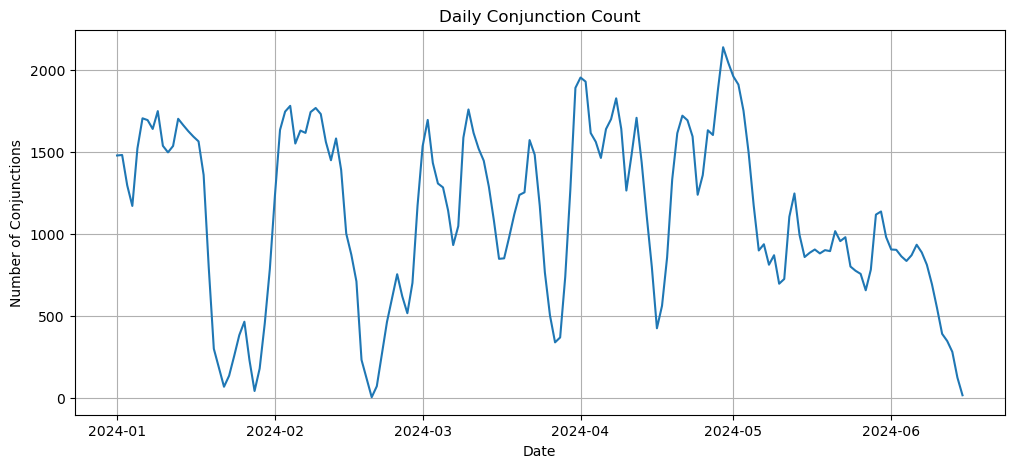

In [3]:
daily_counts = df_small.groupby(df_small['tca'].dt.date).size()

plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title("Daily Conjunction Count")
plt.xlabel("Date")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.show()


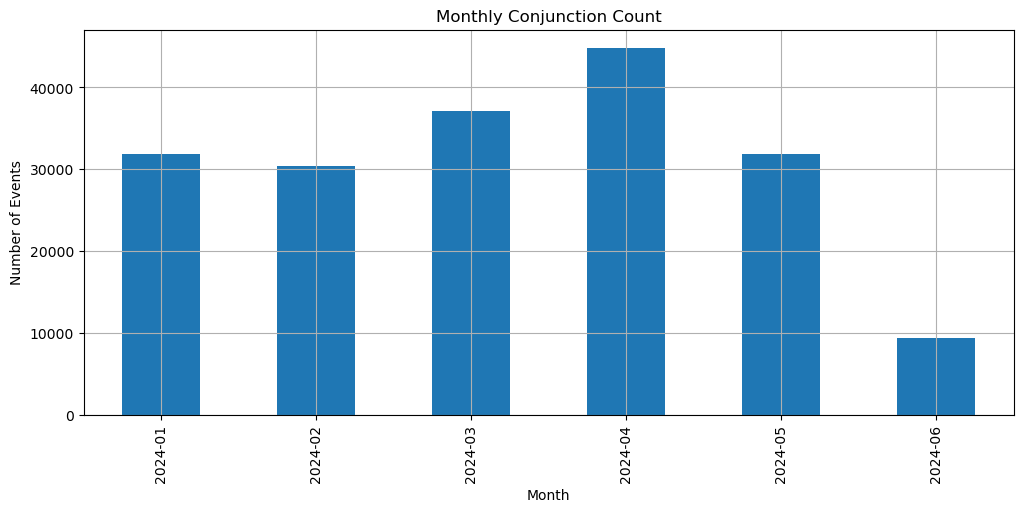

In [4]:
monthly_counts = df_small.groupby(df_small['tca'].dt.to_period("M")).size()

plt.figure(figsize=(12,5))
monthly_counts.plot(kind='bar')
plt.title("Monthly Conjunction Count")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.grid(True)
plt.show()


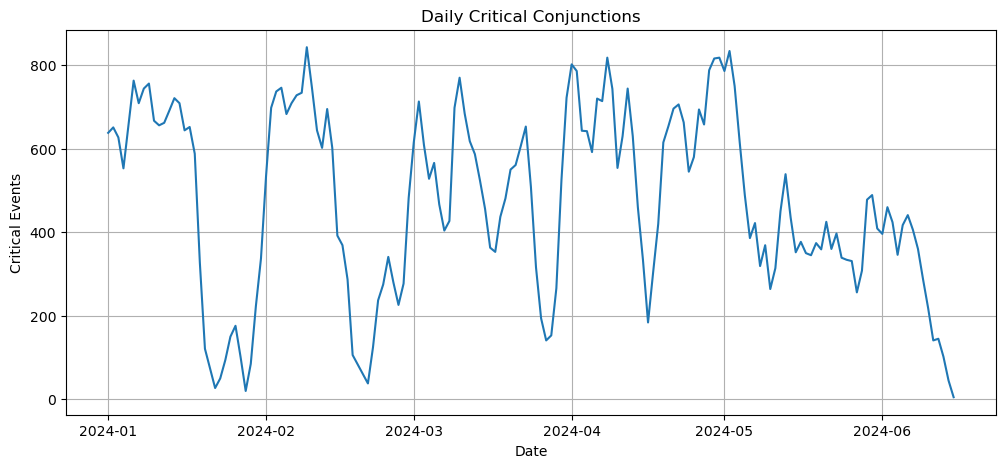

In [5]:
critical_events = df_small[df_small['risk_level'] == "Critical"]
critical_daily = critical_events.groupby(critical_events['tca'].dt.date).size()

plt.figure(figsize=(12,5))
critical_daily.plot()
plt.title("Daily Critical Conjunctions")
plt.xlabel("Date")
plt.ylabel("Critical Events")
plt.grid(True)
plt.show()


In [6]:
# Risk classification (re-run if needed)
def classify_risk(row):
    d = row['miss_distance']
    v = row['relative_speed']
    
    if d > 3000:
        return "Low"
    elif d > 1000:
        return "Medium"
    elif d > 300:
        return "High"
    else:
        return "Critical"

df_small['risk_level'] = df_small.apply(classify_risk, axis=1)


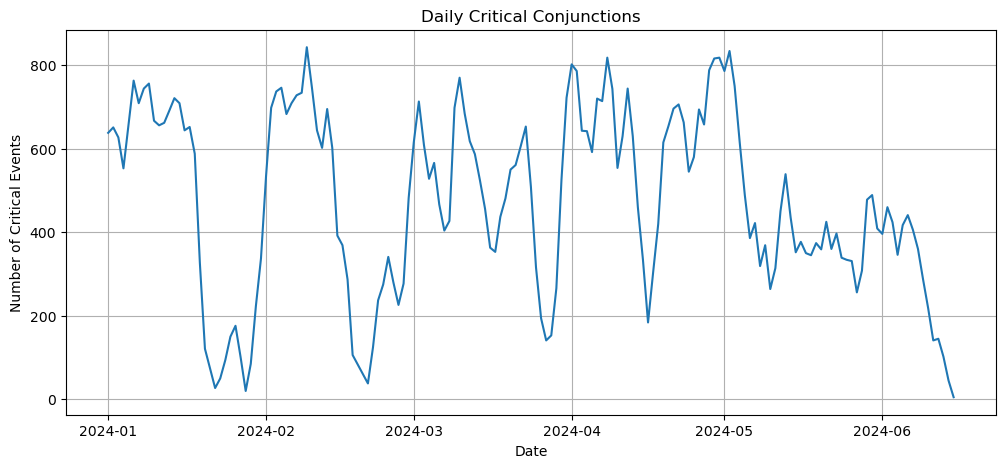

In [7]:
# 4.4 Daily Critical Conjunctions
critical_events = df_small[df_small['risk_level'] == "Critical"]

critical_daily = critical_events.groupby(critical_events['tca'].dt.date).size()

plt.figure(figsize=(12,5))
critical_daily.plot()
plt.title("Daily Critical Conjunctions")
plt.xlabel("Date")
plt.ylabel("Number of Critical Events")
plt.grid(True)
plt.show()


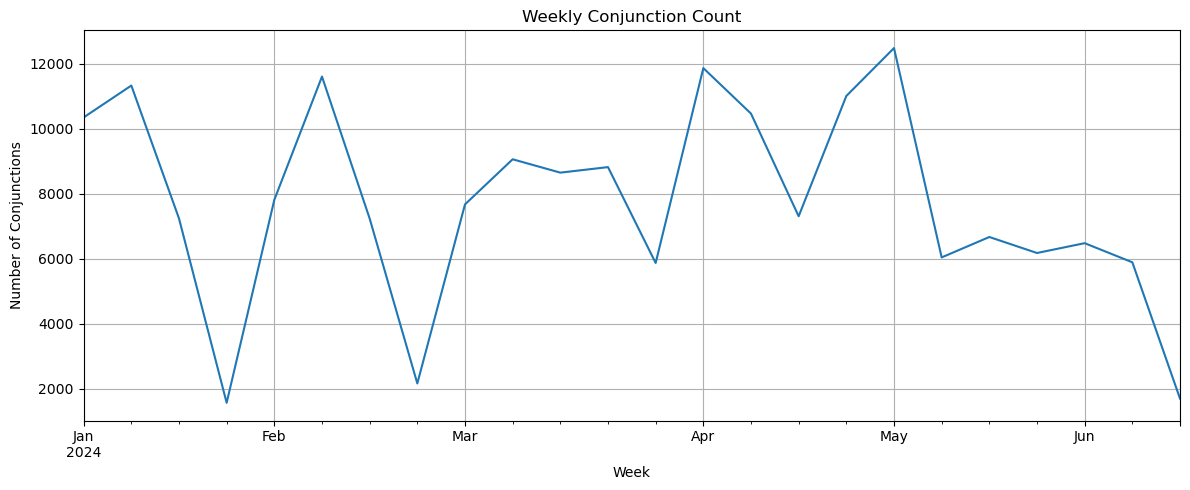

In [8]:
# 4.5 Weekly pattern of conjunctions
weekly_counts = df_small.groupby(df_small['tca'].dt.to_period("W")).size()

plt.figure(figsize=(12,5))
weekly_counts.plot()
plt.title("Weekly Conjunction Count")
plt.xlabel("Week")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.tight_layout()
plt.show()


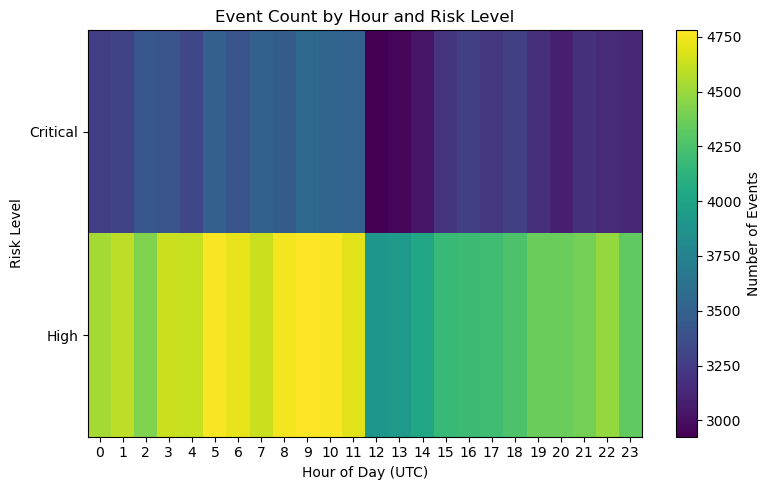

In [9]:
import numpy as np

# Extract hour of day
df_small['hour'] = df_small['tca'].dt.hour

# Count events per hour per risk level
pivot = df_small.pivot_table(
    index='hour',
    columns='risk_level',
    values='conjunction_id',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(8,5))
plt.imshow(pivot.T, aspect='auto')
plt.colorbar(label='Number of Events')
plt.yticks(range(len(pivot.columns)), pivot.columns)
plt.xticks(range(0,24))
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Risk Level")
plt.title("Event Count by Hour and Risk Level")
plt.tight_layout()
plt.show()
